In [0]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


kwargs = {'linewidth':3.5}
font = {'weight': 'normal', 'size':24}
matplotlib.rc('font', **font)

def error_plot(y, yscale = 'log'):
  plt.figure(figsize=(5,5))
  plt.xlabel('Iteration')
  plt.ylabel('Error')
  plt.yscale(yscale)
  plt.plot(range(len(y)), y, **kwargs)

In [0]:
def gd(init, steps, grad):
  x = [init]
  for step in steps:
    x.append(x[-1] - step * grad(x[-1]))
  return x

Toy example!

In [0]:
def F(x):
  return 0.5*(x-4).dot(x-4)

def gradF(x):
  return x-4


In [0]:
x0 = np.random.normal(0,1,(1000))
# print(x0.shape)

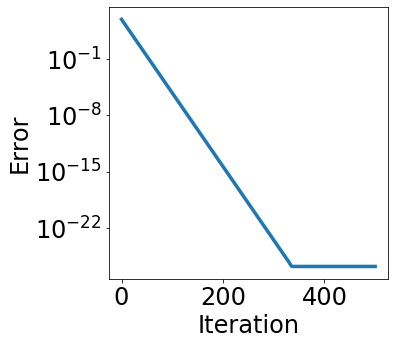

In [21]:
xout = gd(x0, [0.1]*500, gradF) # 0.1 is stepsize, 500 is number of epochs
error_plot([F(x) for x in xout])

In [0]:
def MSE(x, y, w):
  return 0.5* np.linalg.norm(y-x.dot(w))**2

def gradMSE(x,y,w):
  return x.T.dot(x.dot(w)-y)

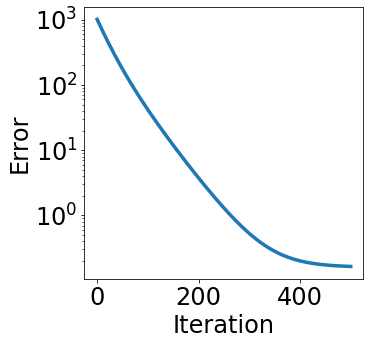

In [33]:
n,d = 100,10
x = np.random.normal(0,1,[n,d])
wtrue = np.random.normal(0,1,d)
noise = np.random.normal(0,0.05,n)
y = x.dot(wtrue) + noise

loss = lambda w: MSE(x,y,w)
gradient = lambda w: gradMSE(x,y,w)

w0 = np.random.normal(0,1,d)
ws = gd(w0, [0.0002]*500, gradient)
error_plot([loss(w) for w in ws])


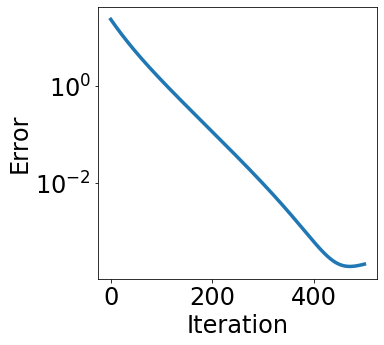

In [34]:
error_plot([np.linalg.norm(w-wtrue)**2 for w in ws])